## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure6_all_together.ipynb `
### where the top part was created in `figure6_cdf` and the bottom was created in `figure2_6_bottom_canopycover.ipynb` 

created by Cassie Lumbrazo\
last updated: July 2025\
run location: UAS Linux\
python environment: **cer_treatment**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import geopandas as gpd

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine

# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds = xr.open_dataset('/home/cassie/data/cer_treatment_manuscript/cer_treatment_region_dataset_all_variables.nc') # Cassie remote path on new linux machine

In [4]:
colorpre='darkslategray'
colorpos='royalblue'

colorsouth = 'darkorange'
colornorth = 'darkblue'

# Calculations First 

## Calculations for the the CDF, top part of the figure

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

# # First, just snow depth by DCE
# ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
# ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
# ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
# ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
# ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

# ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
# ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
# ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
# ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
# ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

# # and, the same thing, but by aspect (side of the ridge)
# ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
# ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
# ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
# ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
# ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

# ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# # and, the same thing, but by aspect (determined by DAH)
# ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
# ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
# ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
# ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
# ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

# ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
# ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

# mkae a north and a south version of all the dce_rapid_baf variables 
ds['dce_rapid_baf_new_1_s'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == 1) # leave gap, no BAF
ds['dce_rapid_baf_new_2_s'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == 1) # leave forest, no BAF
ds['dce_rapid_baf_new_17_s'] = ds['dce_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_30_s'] = ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_60_s'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_69_s'] = ds['dce_rapid_baf_new_69'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_80_s'] = ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_90_s'] = ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_140_s'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_155_s'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == 1)

# make a north and a south version of all the dce_rapid_baf variables
ds['dce_rapid_baf_new_1_n'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == -1) # leave gap, no BAF
# ds['dce_rapid_baf_new_2_n'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == -1) # leave forest, no BAF 
ds['dce_rapid_baf_new_32_n'] = ds['dce_rapid_baf_new_32'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_38_n'] = ds['dce_rapid_baf_new_38'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_60_n'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_82_n'] = ds['dce_rapid_baf_new_82'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_140_n'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_150_n'] = ds['dce_rapid_baf_new_150'].where(ds['baf_ridge'] == -1) # leave forest, need to check the difference between 2 and 150 I think they are the same thing 
ds['dce_rapid_baf_new_155_n'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == -1)


## Calculations for Canopy Cover, bottom part of the figure 

In [6]:
# create two versions of the dataframe, one for the north and one for the south
ds_north = ds.where(ds['baf_ridge'] == -1, drop=True)
ds_south = ds.where(ds['baf_ridge'] ==  1, drop=True)

In [7]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'pre_north', 'pre_south', 'post_north', 'post_south'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 3
    
    #_______________________________________________________________________________
    # PRE-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_south'] = percentage_canopy_cover.values.astype(int)

    #_______________________________________________________________________________
    # POST-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_south'] = percentage_canopy_cover.values.astype(int)

# Print the DataFrame
# print(df)

/tmp/ipykernel_3273520/2941905073.py:28: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_3273520/2941905073.py:63: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_3273520/2941905073.py:28: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_3273520/2941905073.py:63: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_3273520/2941905073.py:45: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'pre_south'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykernel_3273520/2941905073.py:80: RuntimeWarning: invalid value encountered in cast
  df.at[index, 'post_south'] = percentage_canopy_cover.values.astype(int)
/tmp/ipykerne

In [8]:
# cleaning up a few things
df = df.astype(int)

# drop any values < 0, and make nan 
df = df.where(df > 0)

# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
#df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
#                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BA 17', 30: 'BA 30', 32: 'BA 32', 38: 'BA 38', 
                                       60: 'BA 60', 69: 'BA 69', 80: 'BA 80', 82: 'BA 82', 90: 'BA 90', 140: 'BA 140', 150: 'BA 150', 155: 'BA 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

# create a pre and post north and south, removing the BAF 17 and 82 values
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'BA 17', np.nan) # there should not be values for 17 on north
df['post_north'] = df['post_north'].where(df['BAF'] != 'BA 17', np.nan)

df['pre_south'] = df['pre_south'].where(df['BAF'] != 'BA 82', np.nan) # there should not be values for 82 on south
df['post_south'] = df['post_south'].where(df['BAF'] != 'BA 82', np.nan)

# fill the pre_north column and "leave forest" row with 98 
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'leave forest', 98) # filling with the BAF 150 values
df['post_north'] = df['post_north'].where(df['BAF'] != 'leave forest', 99) # filling with the BAF 150 values

# now, drop the row BAF 150 since it's the leave forest and we want it named that for now 
df = df.drop(df[df['BAF'] == 'BA 150'].index)

df_tidy = df.melt(id_vars='BAF', var_name='treatment', value_name='canopy_cover')

df_tidy_north = df_tidy.where((df_tidy['treatment'] == 'pre_north') | (df_tidy['treatment'] == 'post_north')).dropna(how='all')
df_tidy_south = df_tidy.where((df_tidy['treatment'] == 'pre_south') | (df_tidy['treatment'] == 'post_south')).dropna(how='all')

# rename the pre_north to pre-treatment and post_north to post-treatment
df_tidy_north['treatment'] = df_tidy_north['treatment'].replace({'pre_north': 'pre-treatment', 'post_north': 'post-treatment'})
df_tidy_south['treatment'] = df_tidy_south['treatment'].replace({'pre_south': 'pre-treatment', 'post_south': 'post-treatment'})

# but, we do not want the pre-treatment so let's drop those for the following plots 
df_tidy_south_post = df_tidy_south.where(df_tidy_south['treatment'] == 'post-treatment').dropna(how='all')
df_tidy_north_post = df_tidy_north.where(df_tidy_north['treatment'] == 'post-treatment').dropna(how='all')

# Figures 

### Top Part

/tmp/ipykernel_3273520/3792025344.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
/tmp/ipykernel_3273520/3792025344.py:56: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
/tmp/ipykernel_3273520/3792025344.py:59: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1,1], color='olive', label=f'BAF 155, n={np.un

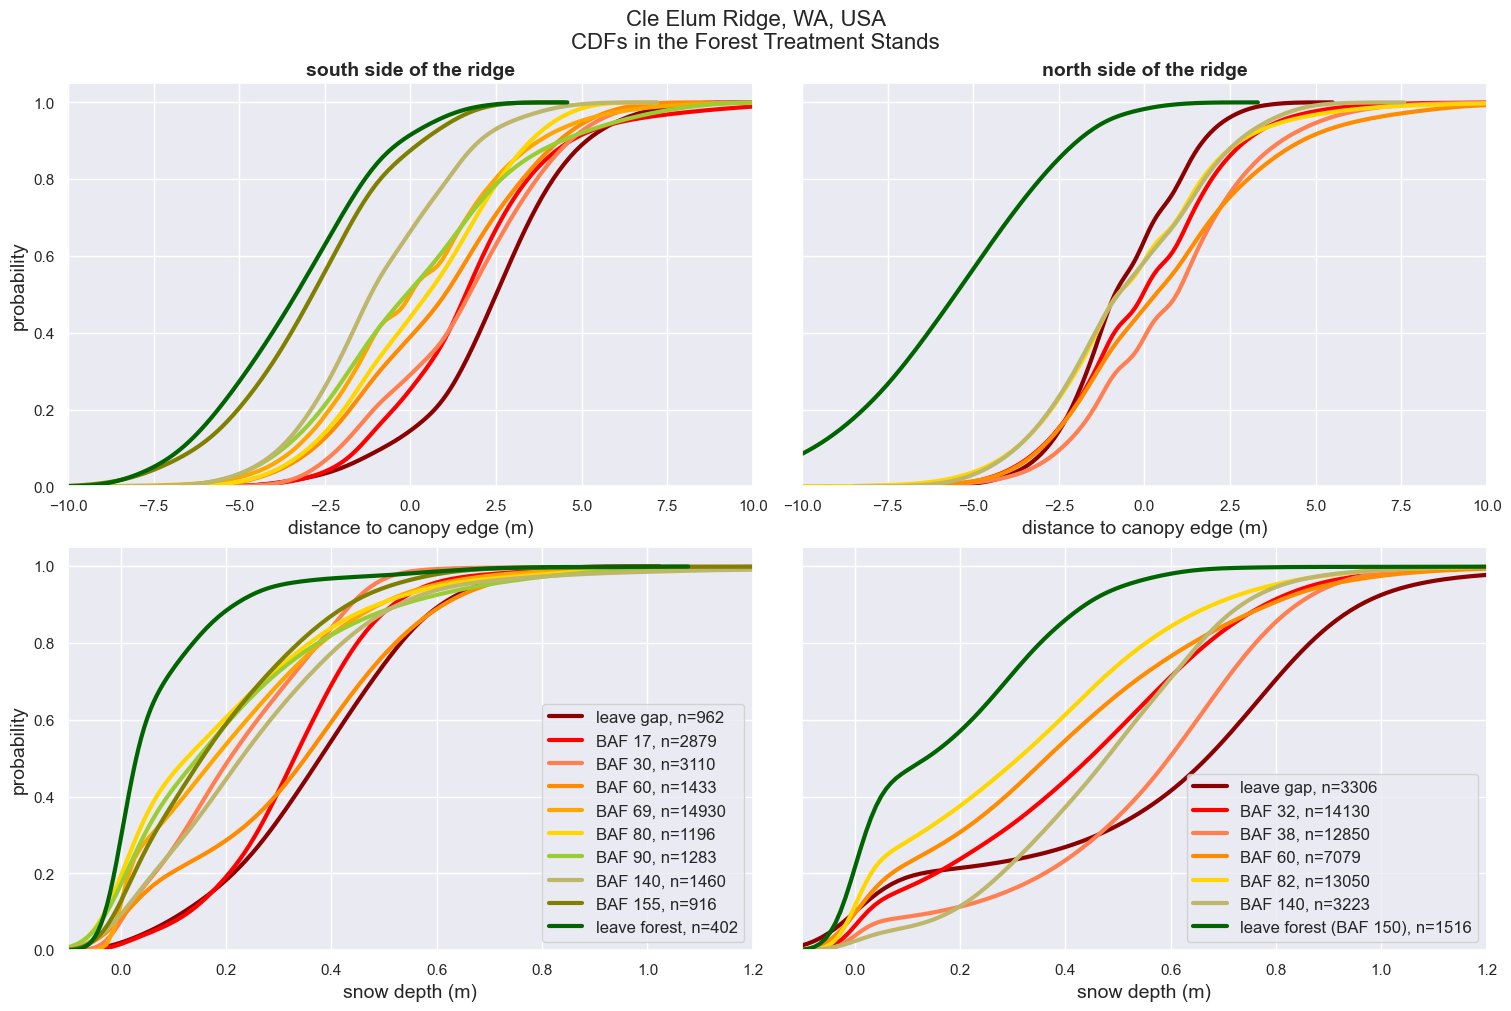

In [9]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 2, sharex='row', sharey=True, figsize=(15,10), constrained_layout = True)
alpha=0.7

# DISTANCE TO CANOPY EDGE ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[0,0], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[0,0], color='red', label=f'BAF 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[0,0], color='coral', label=f'BAF 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[0,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[0,0], color='orange', label=f'BAF 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[0,0], color='gold', label=f'BAF 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[0,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[0,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[0,0], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[0,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[0,1], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[0,1], color='red', label=f'BAF 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[0,1], color='coral', label=f'BAF 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[0,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[0,1], color='gold', label=f'BAF 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[0,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[0,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# SNOW DEPTH -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[1,0], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[1,0], color='red', label=f'BAF 17, n={np.unique(ds["hs_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[1,0], color='coral', label=f'BAF 30, n={np.unique(ds["hs_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[1,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[1,0], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[1,0], color='gold', label=f'BAF 80, n={np.unique(ds["hs_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[1,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["hs_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[1,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[1,0], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[1,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["hs_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1,1], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1,1], color='red', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1,1], color='coral', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1,1], color='gold', label=f'BAF 82, n={np.unique(ds["hs_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1,1], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["hs_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')



# labels
axes[0,0].set_title('south side of the ridge', fontsize=14, fontweight='bold')
axes[0,1].set_title('north side of the ridge', fontsize=14, fontweight='bold')

axes[0,0].set_xlabel('distance to canopy edge (m)', fontsize=14)
axes[0,1].set_xlabel('distance to canopy edge (m)', fontsize=14)

axes[1,0].set_xlabel('snow depth (m)', fontsize=14)
axes[1,1].set_xlabel('snow depth (m)', fontsize=14)

axes[0,0].set_ylabel('probability', fontsize=14)
axes[0,1].set_ylabel('')

axes[1,0].set_ylabel('probability', fontsize=14)
axes[1,1].set_ylabel('')

axes[0,0].set_xlim(-10,10) # dce xlim
axes[1,0].set_xlim(-0.1,1.2) # snow depth xlim

plt.suptitle('Cle Elum Ridge, WA, USA\nCDFs in the Forest Treatment Stands', fontsize=16)

# add an A) B, C, D, to the figures 
# axes[0,0].text(-9, 0.9, 'A)', fontsize=14)
# axes[0,1].text(-9, 0.9, 'B)', fontsize=14)
# axes[1,0].text(-0.08, 0.9, 'C)', fontsize=14)
# axes[1,1].text(-0.08, 0.9, 'D)', fontsize=14)

# export the figure with high resolution
# figure_name = 'figure5_cdf_top.png'
# plt.savefig(figure_path + figure_name, dpi=500)

axes[1,0].legend(fontsize=12)
axes[1,1].legend(fontsize=12)

plt.show()

### Bottom Part

/tmp/ipykernel_3273520/384626810.py:9: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  barplot = sns.barplot(data= df_tidy_north_post, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)
/tmp/ipykernel_3273520/384626810.py:10: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  barplot = sns.barplot(data= df_tidy_south_post, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)
/tmp/ipykernel_3273520/384626810.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38', 'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90', 'BA 140', 'BA 155', 'leave\nforest'])
/tmp/ipykernel_3273520/384626810.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

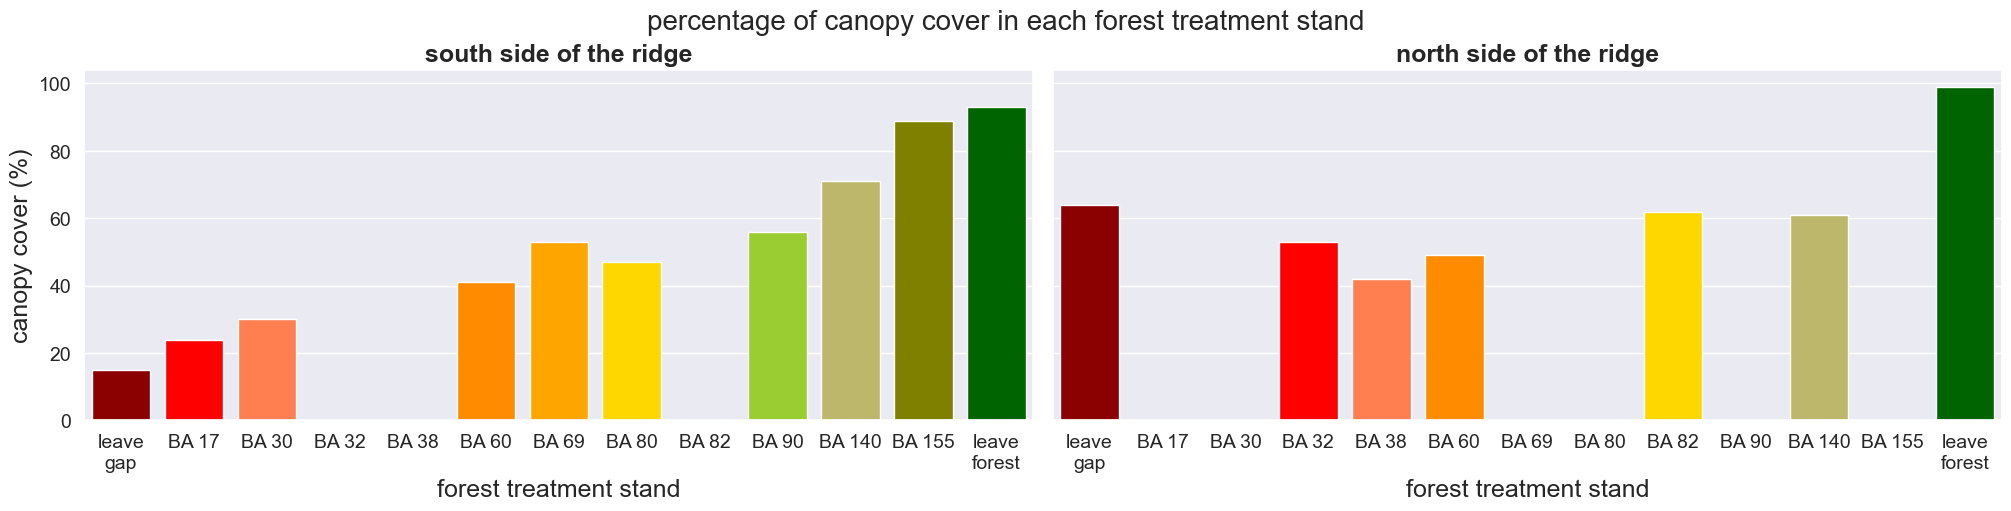

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,5), constrained_layout = True)

fontsize_num = 18
plt.suptitle('percentage of canopy cover in each forest treatment stand', fontsize=20)
palette = [colorpre, colorpos]


# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north_post, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south_post, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Customize the layout
# axes[0].set_xlabel('')
axes[0].set_xlabel('forest treatment stand', fontsize=fontsize_num)
axes[1].set_xlabel('forest treatment stand', fontsize=fontsize_num)
axes[0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_ylabel('', fontsize=fontsize_num)

axes[1].set_title('north side of the ridge', fontsize=fontsize_num, fontweight='bold')
axes[0].set_title('south side of the ridge', fontsize=fontsize_num, fontweight='bold')

# color the boxes to match the cdf figure 
axes[0].patches[0].set_facecolor('darkred') # leave gap
axes[0].patches[1].set_facecolor('red') # BA 17
axes[0].patches[2].set_facecolor('coral') # BA 30
# axes[0].patches[3].set_facecolor('green') # BA 32, nothing
# axes[0].patches[4].set_facecolor('orange') # BA 38, nothing
axes[0].patches[3].set_facecolor('darkorange') # BA 60
axes[0].patches[4].set_facecolor('orange') # BA 69
axes[0].patches[5].set_facecolor('gold') # BA80
# axes[0].patches[8].set_facecolor('purple') # BA82 nothing
axes[0].patches[6].set_facecolor('yellowgreen') # BA90
axes[0].patches[7].set_facecolor('darkkhaki') # BA140
axes[0].patches[8].set_facecolor('olive') # BA155
axes[0].patches[9].set_facecolor('darkgreen') # leave forest (BA155?)

axes[1].patches[0].set_facecolor('darkred') # leave gap
# axes[1].patches[1].set_facecolor('red') # BA 17, nothing
# axes[1].patches[2].set_facecolor('blue') # BA 30, nothing
axes[1].patches[1].set_facecolor('red') # BA 32
axes[1].patches[2].set_facecolor('coral') # BA 38 
axes[1].patches[3].set_facecolor('darkorange') # BA 60 
# axes[1].patches[6].set_facecolor('cyan') # BA 69 nothing
# axes[1].patches[7].set_facecolor('purple') # BA80 nothing
axes[1].patches[4].set_facecolor('gold') # BA82 
# axes[1].patches[9].set_facecolor('purple') # BA90 nothing
axes[1].patches[5].set_facecolor('darkkhaki') # BA140 
# axes[1].patches[11].set_facecolor('purple') # BA155 nothing
axes[1].patches[6].set_facecolor('darkgreen') # leave forest (BA150?)

# previous code for coloring
# # color the boxes to match the cdf figure 
# axes[0].patches[0].set_facecolor('darkred') # leave gap
# axes[0].patches[1].set_facecolor('red') # BA 17
# axes[0].patches[2].set_facecolor('coral') # BA 30
# # axes[0].patches[3].set_facecolor('green') # BA 32, nothing
# # axes[0].patches[4].set_facecolor('orange') # BA 38, nothing
# axes[0].patches[5].set_facecolor('darkorange') # BA 60
# axes[0].patches[6].set_facecolor('orange') # BA 69
# axes[0].patches[7].set_facecolor('gold') # BA80
# # axes[0].patches[8].set_facecolor('purple') # BA82 nothing
# axes[0].patches[9].set_facecolor('yellowgreen') # BA90
# axes[0].patches[10].set_facecolor('darkkhaki') # BA140
# axes[0].patches[11].set_facecolor('olive') # BA155
# axes[0].patches[12].set_facecolor('darkgreen') # leave forest (BA155?)


# axes[1].patches[0].set_facecolor('darkred') # leave gap
# # axes[1].patches[1].set_facecolor('red') # BA 17, nothing
# # axes[1].patches[2].set_facecolor('blue') # BA 30, nothing
# axes[1].patches[3].set_facecolor('red') # BA 32
# axes[1].patches[4].set_facecolor('coral') # BA 38 
# axes[1].patches[5].set_facecolor('darkorange') # BA 60 
# # axes[1].patches[6].set_facecolor('cyan') # BA 69 nothing
# # axes[1].patches[7].set_facecolor('purple') # BA80 nothing
# axes[1].patches[8].set_facecolor('gold') # BA82 
# # axes[1].patches[9].set_facecolor('purple') # BA90 nothing
# axes[1].patches[10].set_facecolor('darkkhaki') # BA140 
# # axes[1].patches[11].set_facecolor('purple') # BA155 nothing
# axes[1].patches[12].set_facecolor('darkgreen') # leave forest (BA150?)


# labels 
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)

axes[0].tick_params(axis='both', which='major', labelsize=14) #,labelrotation=20) 
axes[1].tick_params(axis='both', which='major', labelsize=14) #,labelrotation=20)

axes[0].set_xticklabels(['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38', 'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90', 'BA 140', 'BA 155', 'leave\nforest'])
axes[1].set_xticklabels(['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38', 'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90', 'BA 140', 'BA 155', 'leave\nforest'])


# export the figure with high resolution
# figure_name = 'figure5_bottom.png'
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

### Now, all together

In [11]:
from matplotlib.gridspec import GridSpec

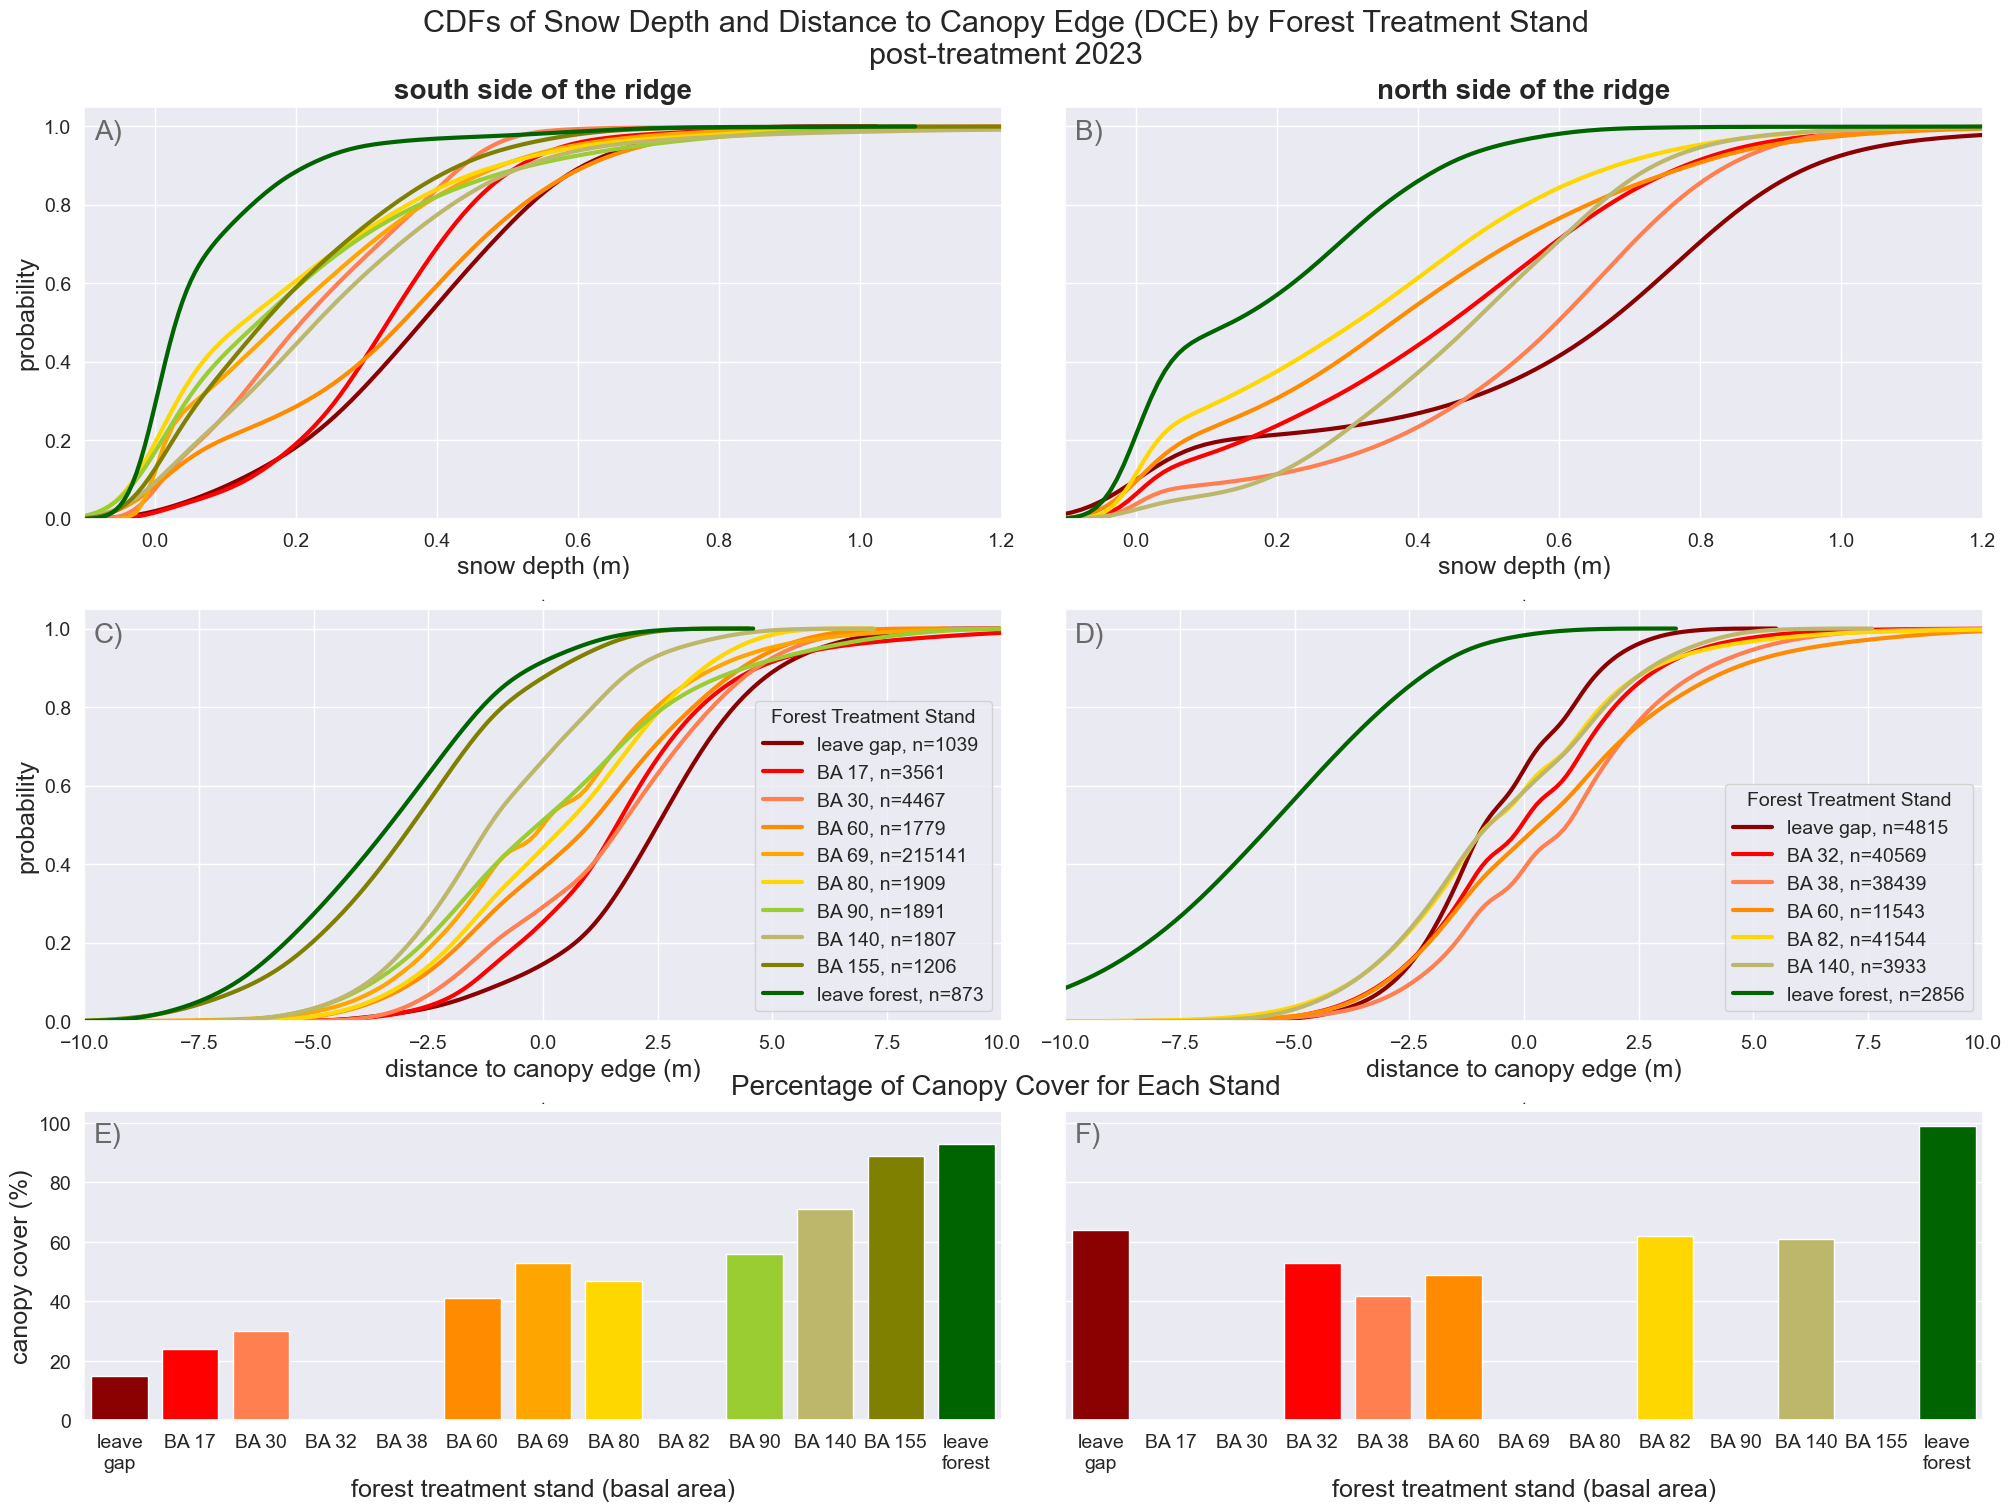

In [15]:
# Combined figure with 3 rows, 2 columns

# Set up the combined figure
# fig, axes = plt.subplots(3, 2, figsize=(20, 15), sharex=False, gridspec_kw={'height_ratios': [2, 2, 1]}, constrained_layout=True) # trying different things for the white space
fig, axes = plt.subplots(3, 2, figsize=(20, 15), sharex=False, gridspec_kw={'height_ratios': [2, 2, 1.5]}, layout='constrained')

# fig = plt.figure(figsize=(20, 15))
# gs = GridSpec(3, 2, height_ratios=[2, 2, 1], hspace=0.4)  # controls vertical white space

# axes = np.array([[fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])],
#                  [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])],
#                  [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])]])


fontsize_num = 18
alpha=0.7

# Helper to configure axis sharing
for row in [0, 1]:
    axes[row][1].sharey(axes[row][0])
    axes[row][0].sharex(axes[row][1])

axes[2][1].sharey(axes[2][0])  # barplot row

# ----------------------
# Top section: CDFs for Snow Depth
# ----------------------
south_hs = ['hs_rapid_baf_new_1_s', 'hs_rapid_baf_new_17_s', 'hs_rapid_baf_new_30_s', 'hs_rapid_baf_new_60_s',
            'hs_rapid_baf_new_69_s', 'hs_rapid_baf_new_80_s', 'hs_rapid_baf_new_90_s', 'hs_rapid_baf_new_140_s',
            'hs_rapid_baf_new_155_s', 'hs_rapid_baf_new_2_s']
colors_south = ['darkred', 'red', 'coral', 'darkorange', 'orange', 'gold', 'yellowgreen', 'darkkhaki', 'olive', 'darkgreen']

north_hs = ['hs_rapid_baf_new_1_n', 'hs_rapid_baf_new_32_n', 'hs_rapid_baf_new_38_n', 'hs_rapid_baf_new_60_n',
            'hs_rapid_baf_new_69_n', 'hs_rapid_baf_new_82_n', 'hs_rapid_baf_new_140_n', 'hs_rapid_baf_new_155_n', 'hs_rapid_baf_new_150_n']
colors_north = ['darkred', 'red', 'coral', 'darkorange', 'orange', 'gold', 'darkkhaki', 'olive', 'darkgreen']

# SOUTH (A)
for var, color in zip(south_hs, colors_south):
    sns.kdeplot(ds[var].values.flatten(), ax=axes[0,0], color=color, cumulative=True, linewidth=3, warn_singular=False)

# NORTH (B)
for var, color in zip(north_hs, colors_north):
    sns.kdeplot(ds[var].values.flatten(), ax=axes[0,1], color=color, cumulative=True, linewidth=3, warn_singular=False)


# ----------------------
# Middle section: CDFs for Distance to Canopy Edge
# ----------------------

# SOUTH (C)
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[1,0], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[1,0], color='red', label=f'BA 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[1,0], color='coral', label=f'BA 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[1,0], color='darkorange', label=f'BA 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[1,0], color='orange', label=f'BA 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[1,0], color='gold', label=f'BA 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[1,0], color='yellowgreen', label=f'BA 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[1,0], color='darkkhaki', label=f'BA 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[1,0], color='olive', label=f'BA 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
# sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[1,0], color='darkgreen', label=f'leave forest\n(BA 155), n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[1,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, warn_singular=False)


# NORTH (D)
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[1,1], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[1,1], color='red', label=f'BA 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[1,1], color='coral', label=f'BA 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[1,1], color='darkorange',label=f'BA 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[1,1], color='gold', label=f'BA 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[1,1], color='darkkhaki', label=f'BA 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
# sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[1,1], color='olive', label=f'BA 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
# sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[1,1], color='darkgreen',label=f'leave forest\n(BA 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)
sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[1,1], color='darkgreen',label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, warn_singular=False)


# ----------------------
# Bottom section: Bar plots
# ----------------------

# SOUTH (E)
sns.barplot(data=df_tidy_south_post, ax=axes[2,0], x='BAF', y='canopy_cover', hue='treatment')
axes[2,0].set_xlabel('forest treatment stand (basal area)', fontsize=fontsize_num)
axes[2,0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)

patches = axes[2,0].patches
patch_colors_south = ['darkred', 'red', 'coral', 'darkorange', 'orange', 'gold', 'yellowgreen', 'darkkhaki', 'olive', 'darkgreen']
for p, c in zip(patches, patch_colors_south):
    p.set_facecolor(c)

# NORTH (F)
sns.barplot(data=df_tidy_north_post, ax=axes[2,1], x='BAF', y='canopy_cover', hue='treatment')
axes[2,1].set_xlabel('forest treatment stand (basal area)', fontsize=fontsize_num)
axes[2,1].set_ylabel('', fontsize=fontsize_num)

patches = axes[2,1].patches
patch_colors_north = ['darkred', 'red', 'coral', 'darkorange', 'gold', 'darkkhaki', 'darkgreen']
for i, color in enumerate(patch_colors_north):
    patches[i].set_facecolor(color)


# ----------------------
# Formatting
# ----------------------

# labels
fontsize_num = 18
axes[0,0].set_title('south side of the ridge', fontsize=20, fontweight='bold')
axes[0,1].set_title('north side of the ridge', fontsize=20, fontweight='bold')

axes[0,0].set_ylabel('probability', fontsize=fontsize_num)
axes[0,1].set_ylabel('')

axes[1,0].set_ylabel('probability', fontsize=fontsize_num)
axes[1,1].set_ylabel('')

axes[0,0].set_xlabel('snow depth (m)', fontsize=fontsize_num)
axes[0,1].set_xlabel('snow depth (m)', fontsize=fontsize_num)

axes[1,0].set_xlabel('distance to canopy edge (m)', fontsize=fontsize_num)
axes[1,1].set_xlabel('distance to canopy edge (m)', fontsize=fontsize_num)

axes[1,0].set_xlim(-10,10) # dce xlim
axes[0,0].set_xlim(-0.1,1.2) # snow depth xlim

# legends
axes[1,0].legend(title='Forest Treatment Stand', fontsize=14, title_fontsize=14)
axes[1,1].legend(title='Forest Treatment Stand', fontsize=14, title_fontsize=14)
# axes[1,0].legend().set_visible(False)
# axes[1,1].legend().set_visible(False)
axes[2,0].legend().set_visible(False)
axes[2,1].legend().set_visible(False)

# remove the ytick marks from the second column plots to get everything tighter together 
axes[0,1].tick_params(axis='y', which='both', left=False, labelleft=False)
axes[1,1].tick_params(axis='y', which='both', left=False, labelleft=False)
axes[2,1].tick_params(axis='y', which='both', left=False, labelleft=False)

# increase the fontsize of all the tick labels 
fontsize_num=14
axes[0,0].tick_params(axis='both', which='major', labelsize=fontsize_num) 
axes[0,1].tick_params(axis='both', which='major', labelsize=fontsize_num) 
axes[1,0].tick_params(axis='both', which='major', labelsize=fontsize_num) 
axes[1,1].tick_params(axis='both', which='major', labelsize=fontsize_num) 
axes[2,0].tick_params(axis='both', which='major', labelsize=fontsize_num) 
axes[2,1].tick_params(axis='both', which='major', labelsize=fontsize_num) 

# row 3 titles 
# axes[2,0].set_title('south side of the ridge', fontsize=fontsize_num, fontweight='bold')
# axes[2,1].set_title('north side of the ridge', fontsize=fontsize_num, fontweight='bold') # I feel like the second label is not needed in the combined... let's see 
axes[2,0].set_title('.') # trying something to adjust the white space for row 3
axes[2,1].set_title('.')

axes[1,0].set_title('.') # trying something to adjust the white space for row 2 also?
axes[1,1].set_title('.')

# Add a title to each row of subplot
# plt.subplots_adjust(hspace=0.05)
# plt.subplots_adjust(wspace=.8)
fig.text(0.5, 0.27, 'Percentage of Canopy Cover for Each Stand', ha='center', va='bottom', fontsize=20)

# add an A), B) to the figure 
fontsize_num = 20
axes[0,0].text(0.01, 0.92, 'A)', fontsize=fontsize_num, color='dimgray', transform=axes[0,0].transAxes)
axes[0,1].text(0.01, 0.92, 'B)', fontsize=fontsize_num, color='dimgray', transform=axes[0,1].transAxes)
axes[1,0].text(0.01, 0.92, 'C)', fontsize=fontsize_num, color='dimgray', transform=axes[1,0].transAxes)
axes[1,1].text(0.01, 0.92, 'D)', fontsize=fontsize_num, color='dimgray', transform=axes[1,1].transAxes)
axes[2,0].text(0.01, 0.90, 'E)', fontsize=fontsize_num, color='dimgray', transform=axes[2,0].transAxes)
axes[2,1].text(0.01, 0.90, 'F)', fontsize=fontsize_num, color='dimgray', transform=axes[2,1].transAxes)

# titles 
fig.suptitle('CDFs of Snow Depth and Distance to Canopy Edge (DCE) by Forest Treatment Stand\npost-treatment 2023', fontsize=22)

# making the leave gap and leave forest labels more readable
# axes[2,0].set_xticklabels(['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38', 'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90', 'BA 140', 'BA 155', 'leave\nforest'])
# axes[2,1].set_xticklabels(['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38', 'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90', 'BA 140', 'BA 155', 'leave\nforest'])
tick_labels = ['leave\ngap', 'BA 17', 'BA 30', 'BA 32', 'BA 38',
               'BA 60', 'BA 69', 'BA 80', 'BA 82', 'BA 90',
               'BA 140', 'BA 155', 'leave\nforest']

tick_locs = range(len(tick_labels))  # tick labels for integer locations
axes[2, 0].set_xticks(tick_locs)
axes[2, 0].set_xticklabels(tick_labels)
axes[2, 1].set_xticks(tick_locs)
axes[2, 1].set_xticklabels(tick_labels)

# export the figure with high resolution
figure_name = 'figure6_all_together.png'
plt.savefig(figure_path + figure_name, dpi=500, bbox_inches='tight')

plt.show()